In [1]:
import pyxdf
from utils import sync_streams, combine_streams

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def view_xdf_streams(data):
    for stream in data:
        stream_name = stream["info"]["name"][0]
        stream_id = stream["info"]["stream_id"]
        stream_srate = stream["info"]["effective_srate"]
        
        print(f'Stream {stream_name} (Stream ID: {stream_id} with sampling rate {stream_srate})')

Group 12:

Task Begin: Immediately after Chris says "if you need anything."
Task End: Immediately before Chris says "Add any finishing touches you think you need to."

CSL_LabPC [NOT RECORDED]
Start OBS Vid  UNIX timestamp: 1738163146.265
Task Beginning UNIX timestamp: 1738163294.265 (147 sec in)
Task End       UNIX timestamp: 1738166890.432 (3744 sec in)

CSL_Laptop
Start OBS Vid  UNIX timestamp: 1738163111.876
Task Beginning UNIX timestamp: 1738163289.242 (177 sec in)
Task End       UNIX timestamp: 1738166885.569 (3773 sec in)

HCI_Lab1 [manually made an educated guess based off of CSL stream timestamps]
Start OBS Vid  UNIX timestamp: 1738163106.842
Task Beginning UNIX timestamp: 1738163278.309 (172 sec in - according to CSL_Laptop)
Task End       UNIX timestamp: 1738166874.309 (3768 sec in)

HCI_Lab2
Start OBS Vid  UNIX timestamp: 1738163138.951
Task Beginning UNIX timestamp: 1738163294.946 (156 sec in)
Task End       UNIX timestamp: 1738166891.899 (3753 sec in)

In [3]:
group_num = 12
WPI_xdf_path_1 = f"../Group {group_num}/HCILab1-Group12.xdf"
WPI_xdf_path_2 = f"../Group {group_num}/HCILab2-Group12.xdf"
CSL_xdf_path = f"../Group {group_num}/CSL_Laptop_group12.xdf"

WPI_data_streams_1, WPI_header_1 = pyxdf.load_xdf(WPI_xdf_path_1)
WPI_data_streams_2, WPI_header_2 = pyxdf.load_xdf(WPI_xdf_path_2)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)

print("\nHCILab1:")
view_xdf_streams(WPI_data_streams_1)
print("\nHCILab2:")
view_xdf_streams(WPI_data_streams_2)

WPI_data_streams_1 = [stream for stream in WPI_data_streams_1 if (
                    stream['info']['name'][0] == 'Unicorn_HCILab1' or
                    stream['info']['name'][0] == 'OBS_HCILab1'
                    )]
WPI_data_streams_2 = [stream for stream in WPI_data_streams_2 if (
                    stream['info']['name'][0] == 'Unicorn_HCILab2' or
                    stream['info']['name'][0] == 'OBS_HCILab2'
                    )]

WPI_data_streams = WPI_data_streams_1 + WPI_data_streams_2
CSL_data_streams = [stream for stream in CSL_data_streams if (
                    stream['info']['name'][0] == 'Unicorn_CSL_Laptop' or
                    stream['info']['name'][0] == 'OBS_CSL_Laptop'
                    )]

video_start_UNIX_times = {
    "OBS_HCILab1": 1738163106.842,
    "OBS_HCILab2": 1738163138.951,
    "OBS_CSL_Laptop": 1738163111.876
}

task_start_UNIX_times = {
    "OBS_HCILab1": 1738163278.309,
    "OBS_HCILab2": 1738163294.946,
    "OBS_CSL_Laptop": 1738163289.242
}
task_duration = 1738166890.432 - 1738163294.265
task_duration

Stream 2: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.
Stream 2: Calculated effective sampling rate 23.8180 Hz is different from specified rate 30.0000 Hz.
Stream 6: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.
Stream 7: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.



HCILab1:
Stream Unicorn_HCILab1 (Stream ID: 3 with sampling rate 250.3224056050857)
Stream OBS_HCILab1 (Stream ID: 4 with sampling rate 30.000000265139583)
Stream Unicorn_HCILab2 (Stream ID: 1 with sampling rate 231.89181383660082)
Stream Unicorn_CSL_LabPC (Stream ID: 2 with sampling rate 0)

HCILab2:
Stream OBS_HCILab2 (Stream ID: 2 with sampling rate 23.818020613802744)
Stream Unicorn_HCILab2 (Stream ID: 1 with sampling rate 231.8348393056919)
Stream OBS_HCILab1 (Stream ID: 4 with sampling rate 29.999656410462155)
Stream OBS_CSL_LabPC (Stream ID: 3 with sampling rate 59.99951623108741)
Stream Unicorn_CSL_LabPC (Stream ID: 6 with sampling rate 0)
Stream OBS_CSL_Laptop (Stream ID: 5 with sampling rate 29.999525906345397)


3596.1669998168945

In [4]:
view_xdf_streams(WPI_data_streams)

Stream Unicorn_HCILab1 (Stream ID: 3 with sampling rate 250.3224056050857)
Stream OBS_HCILab1 (Stream ID: 4 with sampling rate 30.000000265139583)
Stream OBS_HCILab2 (Stream ID: 2 with sampling rate 23.818020613802744)
Stream Unicorn_HCILab2 (Stream ID: 1 with sampling rate 231.8348393056919)


In [5]:
view_xdf_streams(CSL_data_streams)

Stream OBS_CSL_Laptop (Stream ID: 5 with sampling rate 30.00000033019512)
Stream Unicorn_CSL_Laptop (Stream ID: 1 with sampling rate 250.32704083271267)


length of EEG stream: 993656
start_EEG_index: 50742, end_EEG_index: 949784
padded_start_EEG_index: 41742, padded_end_EEG_index: 958784
actual end EEG index: 908042
For EEG Stream Unicorn_HCILab1, start cutoff index is 9000 and end cutoff index is 908042

length of EEG stream: 964708
start_EEG_index: 69123, end_EEG_index: 968165
padded_start_EEG_index: 60123, padded_end_EEG_index: 977165
actual end EEG index: 904585
[cut short] For EEG Stream Unicorn_HCILab2, start cutoff index is 9000 and end cutoff index is 904585

length of EEG stream: 973528
start_EEG_index: 45146, end_EEG_index: 944188
padded_start_EEG_index: 36146, padded_end_EEG_index: 953188
actual end EEG index: 908042
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is 9000 and end cutoff index is 908042



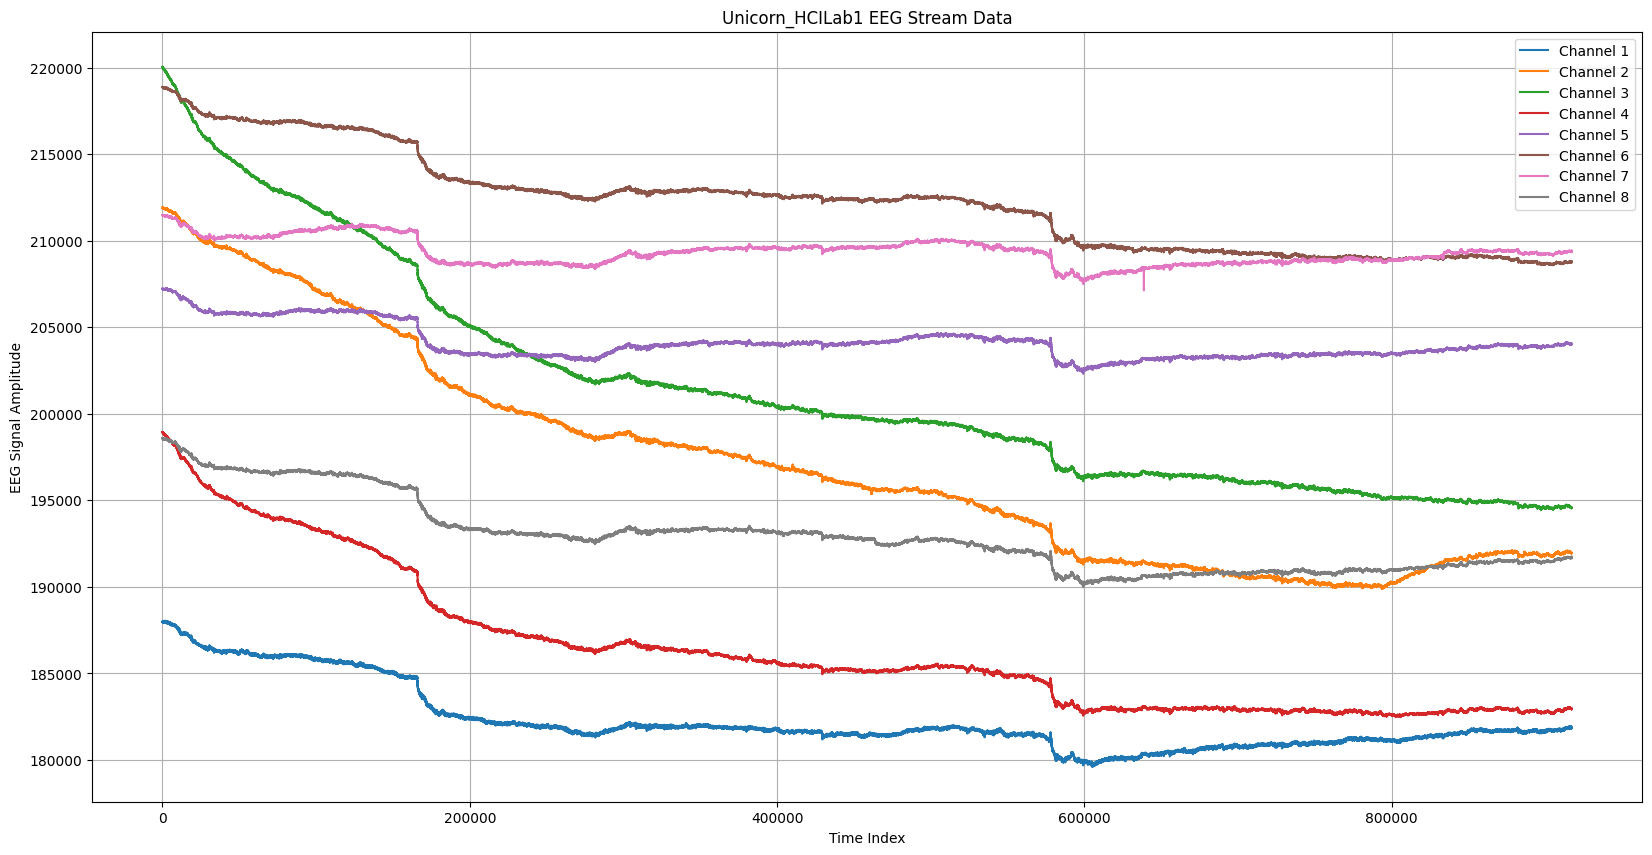

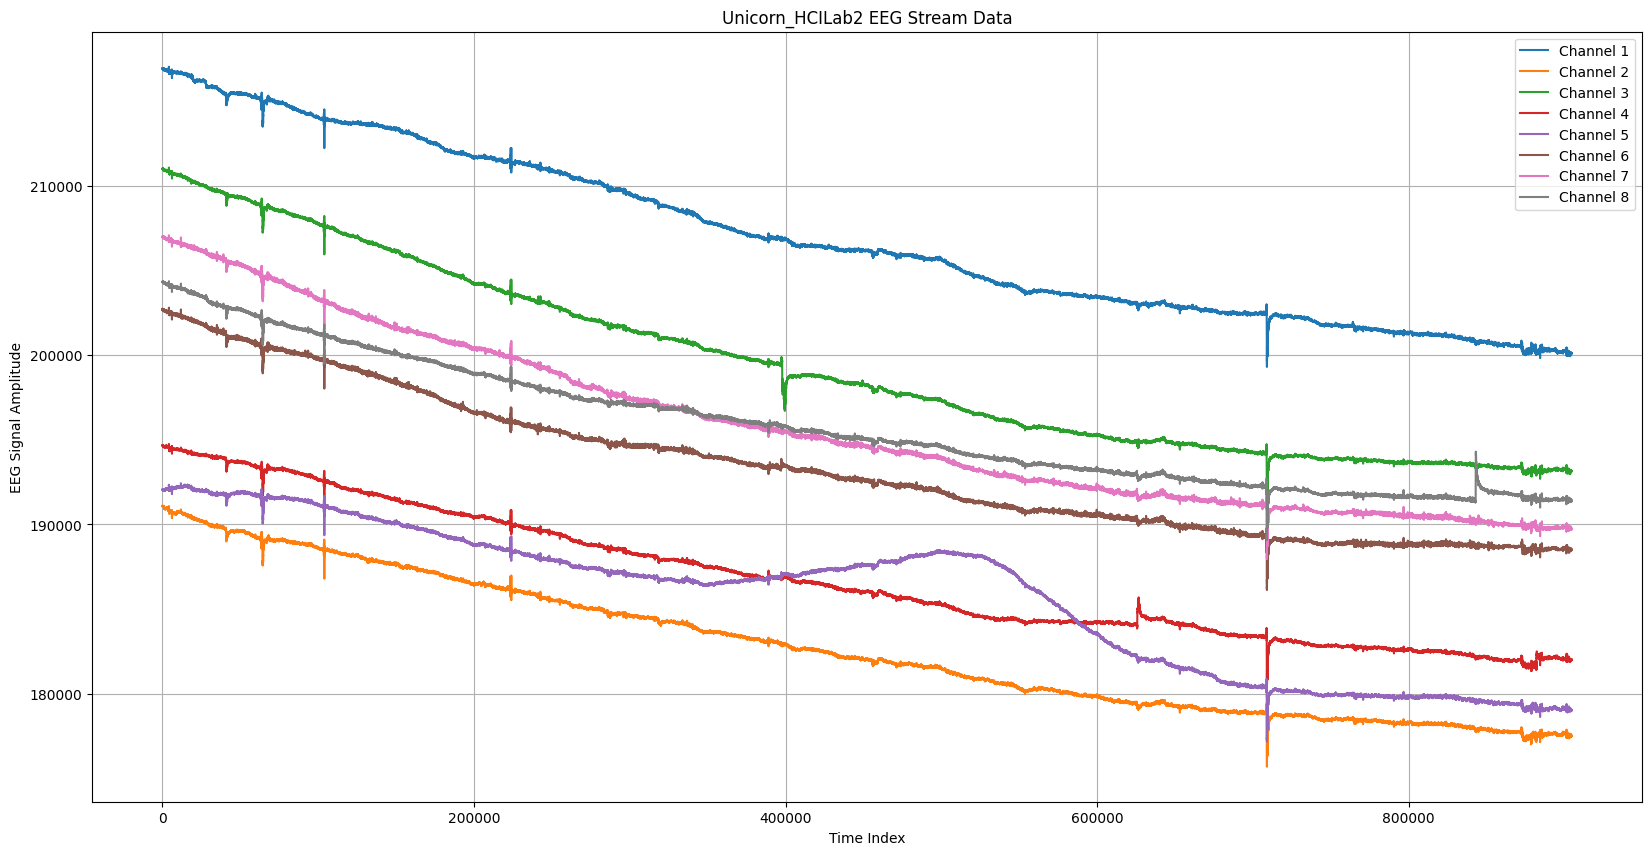

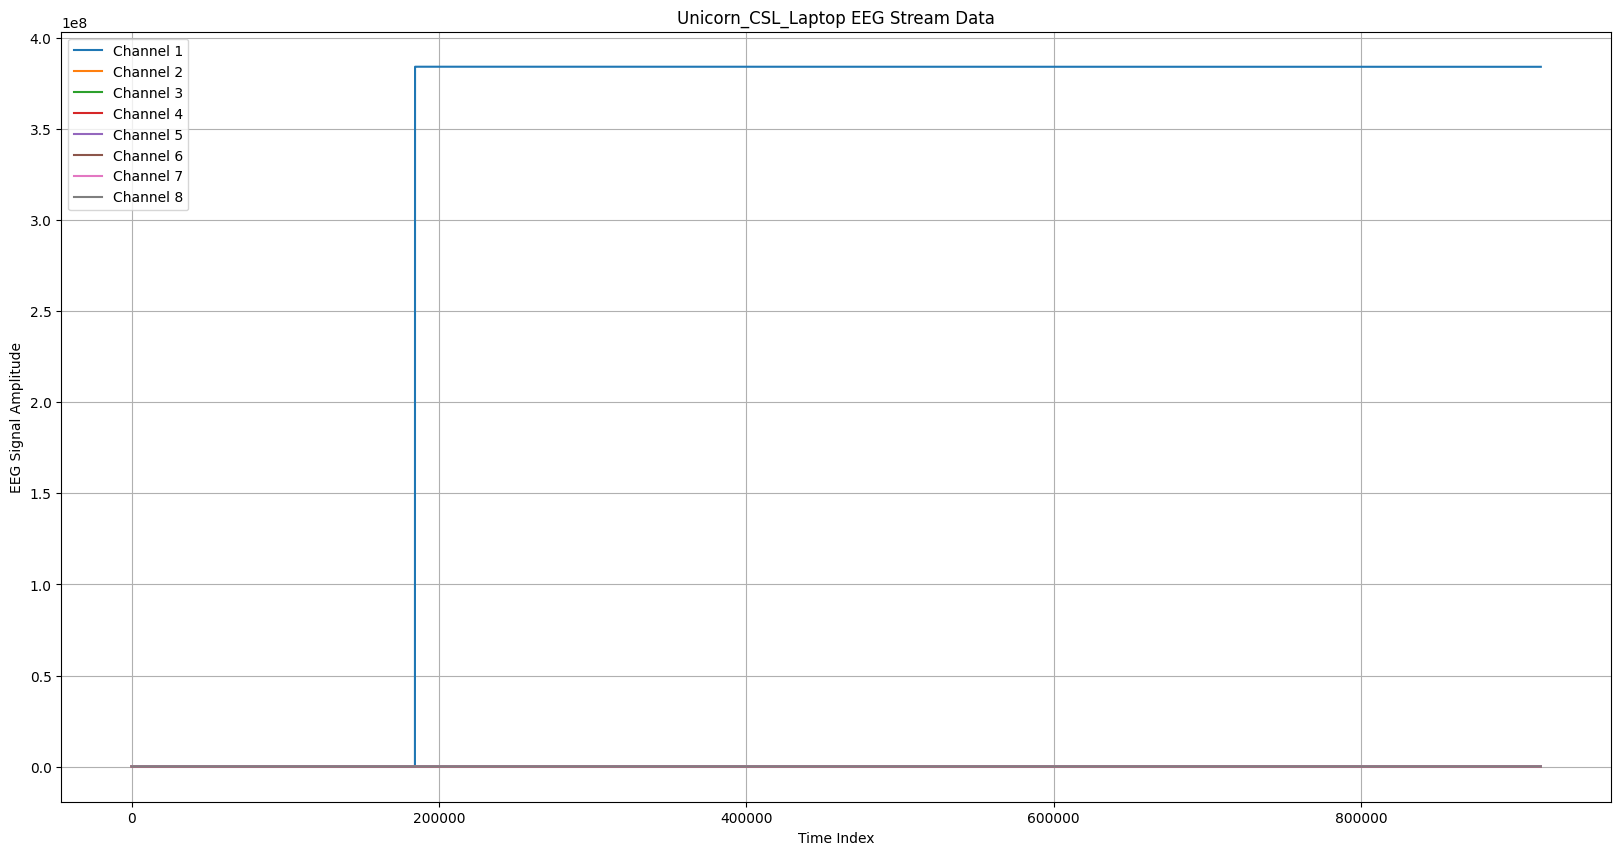

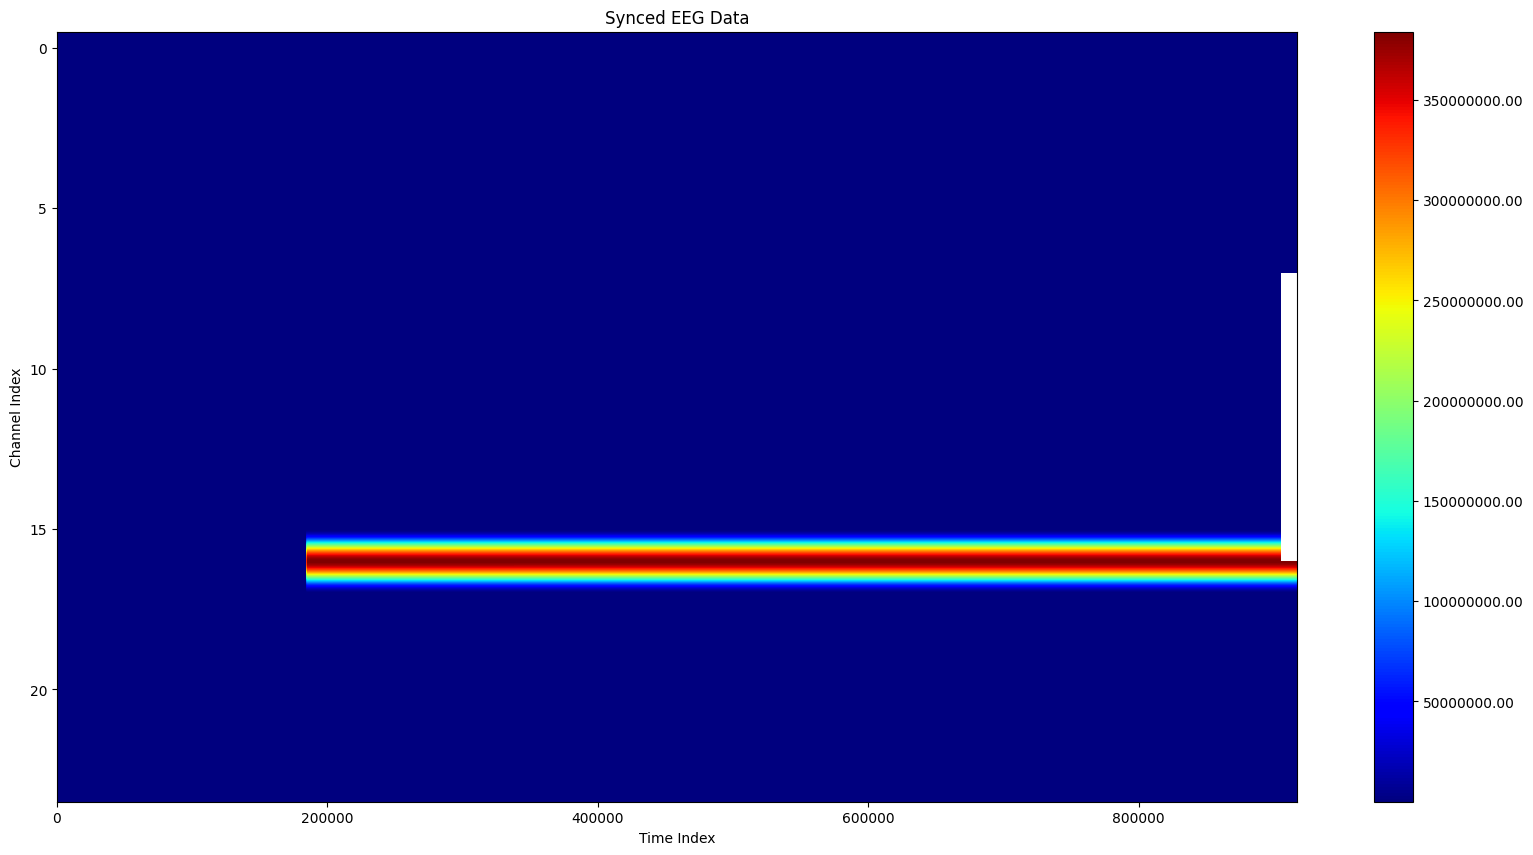

Min: 2.0563604831695557
Max: 384000032.0
Mean: 13033094.783622937
Standard Deviation: 68997597.95094906


In [6]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams, video_start_UNIX_times, task_start_UNIX_times, task_duration)
combine_streams(group_num, streams)